# INTRODUCCIÓN A LOS DATAFRAMES

In [241]:
import pandas as pd

In [242]:
iris_df = pd.read_csv("https://raw.githubusercontent.com/toneloy/data/master/iris.csv")  # leer el archivo iris.csv en la web.

In [243]:
iris_df.head(8)  #este comando permite visualizar los primeros 5 registros , si escribimos iris_df.head(8) me entrega los primeros 10 registros

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


In [244]:
iris_df[['species', 'petal_length']] # se obtiene dos campos del dataset

,species,petal_length
0,setosa,1.4
1,setosa,1.4
2,setosa,1.3
3,setosa,1.5
4,setosa,1.4
...,...,...
145,virginica,5.2
146,virginica,5.0
147,virginica,5.2
148,virginica,5.4


In [245]:
iris_df['petal_length'].mean() # sirve para obtener la media

3.7580000000000027

In [246]:
iris_df.describe() # sirve para obtener todos los estadísticos descriptivos del dataset

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# ANALISIS EXPLORATORIO DE DATOS

Se debe importar todas las librerias para realizar la exploración

In [247]:
import pandas as pd  # libreria para obtener datos y usar ciencia de datos
import matplotlib.pyplot as plt # libreria para realizar gráficas
import seaborn as sns #libreria para hacer gráficas, mas elaboradas que la enterior
import numpy as np # libreria que tiene metodos numericos para python
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler
from scipy import stats 
%matplotlib inline 
plt.rcParams['font.size'] = 15

In [248]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot:xlabel='species'>

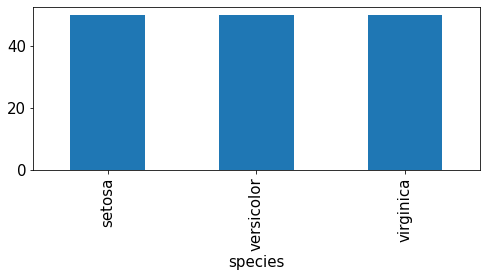

In [249]:
iris_df.value_counts(df_iris['species']).plot.bar( figsize = (8,3))

## BoxPlots para longitud Y ancho de sépalo y longitud y anchos de pétalo

In [250]:
var = 'species' #se define esta variable species para almanar el nombre de la variable categorica 

### Se crea conjuntos de datos  de longitudes  por cada especie , concatenando 

In [251]:
datosLongitudSepalo = pd.concat([iris_df['sepal_length'],iris_df[var]], axis = 1) 
datosAnchoSepalo = pd.concat([iris_df['sepal_width'],iris_df[var]], axis = 1)
datosLongitudPetalo = pd.concat([iris_df['petal_length'],iris_df[var]], axis = 1)
datosAnchoPetalo = pd.concat([iris_df['petal_width'],iris_df[var]], axis = 1)


In [252]:
datosLongitudSepalo.head(5)


,sepal_length,species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa


In [253]:
datosAnchoSepalo.head(5)

,sepal_width,species
0,3.5,setosa
1,3.0,setosa
2,3.2,setosa
3,3.1,setosa
4,3.6,setosa


In [254]:
datosLongitudPetalo.head(5)


,petal_length,species
0,1.4,setosa
1,1.4,setosa
2,1.3,setosa
3,1.5,setosa
4,1.4,setosa


In [255]:
datosAnchoPetalo.head(5)

,petal_width,species
0,0.2,setosa
1,0.2,setosa
2,0.2,setosa
3,0.2,setosa
4,0.2,setosa


(-0.5, 2.5, 0.0, 3.0)

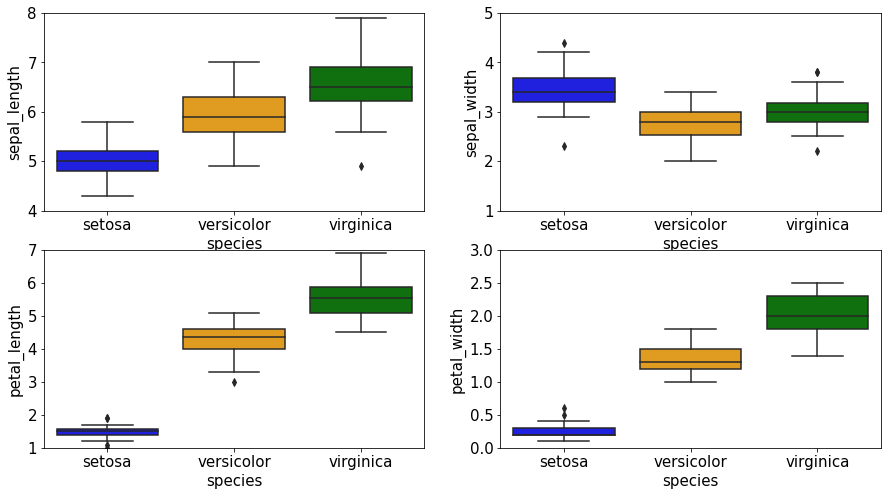

In [256]:
var = 'species' 

f, ax =   plt.subplots(figsize=(15,8)) #area en donde voy a graficar

plt.subplot (2,2,1) # define posicion izquierda para primer grafico
fig = sns.boxplot(x=var, y="sepal_length", data =datosLongitudSepalo, palette =['blue', 'orange', 'green'])   # se dibuja el boxplot
fig.axis (ymin=4, ymax=8) 

plt.subplot (2,2,2)  #define posicion para segundo grafico
fig = sns.boxplot(x=var, y="sepal_width", data =datosAnchoSepalo, palette =['blue', 'orange', 'green'])   # se dibuja el boxplot
fig.axis (ymin=1, ymax=5) 

plt.subplot (2,2,3) # define posicion izquierda para primer grafico
fig = sns.boxplot(x=var, y="petal_length", data =datosLongitudPetalo, palette =['blue', 'orange', 'green'])   # se dibuja el boxplot
fig.axis (ymin=1, ymax=7) 

plt.subplot (2,2,4)  #define posicion para segundo grafico
fig = sns.boxplot(x=var, y="petal_width", data =datosAnchoPetalo, palette =['blue', 'orange', 'green'])   # se dibuja el boxplot
fig.axis (ymin=0, ymax=3) 



# SCATTERPLOT o Diagrama de Dispersión

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

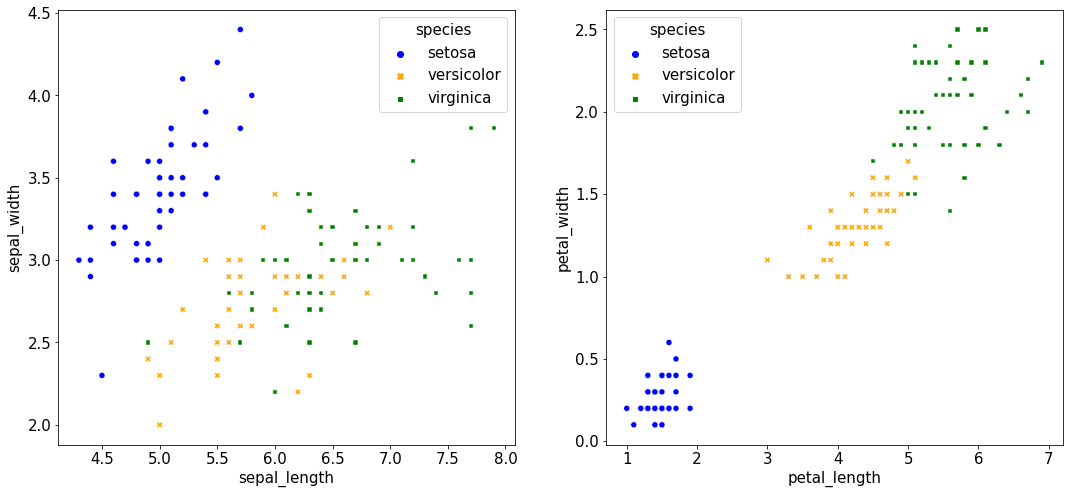

In [257]:
f, ax =   plt.subplots(figsize=(18,8)) #area en donde voy a graficar
plt.subplot (1,2,1)
sns.scatterplot (x = iris_df.sepal_length, y = iris_df.sepal_width, hue = iris_df.species, style = iris_df.species, palette =['blue', 'orange', 'green'])
plt.subplot (1,2,2)
sns.scatterplot (x = iris_df.petal_length, y = iris_df.petal_width, hue = iris_df.species, style = iris_df.species, palette =['blue', 'orange', 'green'])



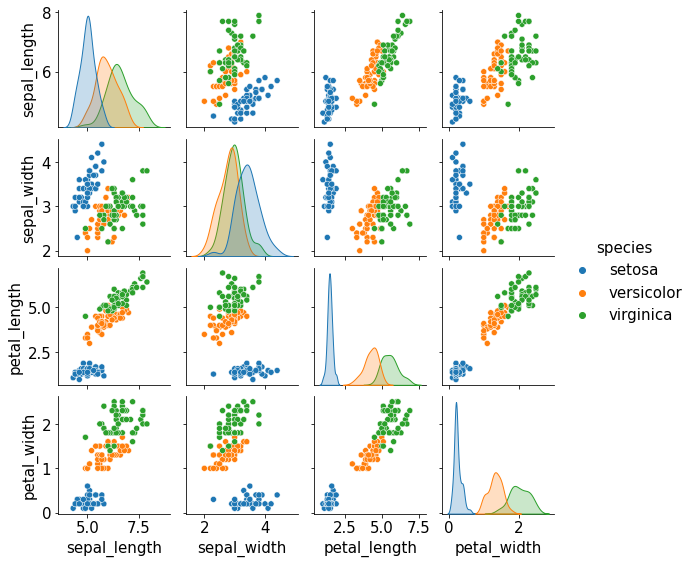

In [264]:
sns.pairplot(iris_df,  hue='species', height=2)

# Algoritmo de agrupacion para diferentes valores de K

### se debe hallar el valor óptimo de K
### se aplica el método del codo para hallar K
### Se calcula el algoritmo de agrupacion para diferentes valores de K

In [324]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [333]:
indiceMuestra =[30,51,120]
muestras = pd.DataFrame (iris_df.loc[indiceMuestra], columns = iris_df.keys()).reset_index(drop =True)

In [334]:
muestras

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.8,3.1,1.6,0.2,setosa
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.2,5.7,2.3,virginica


In [ ]:
iris_df= iris_df.drop(indiceMuestra, axis = 0)

In [342]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.839456,3.055102,3.754422,1.196599
std,0.826161,0.439985,1.766012,0.759724
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.550000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.350000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [380]:
X = iris_df.iloc[:, [0, 1, 2,3]].values

In [382]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.839456,3.055102,3.754422,1.196599
std,0.826161,0.439985,1.766012,0.759724
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.550000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.350000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [383]:
inercia =[] # suma de cuadrados
for i in range (1,20): 
        algoritmo = KMeans (n_clusters  = i, max_iter =300).fit(X)
        inercia.append(algoritmo.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

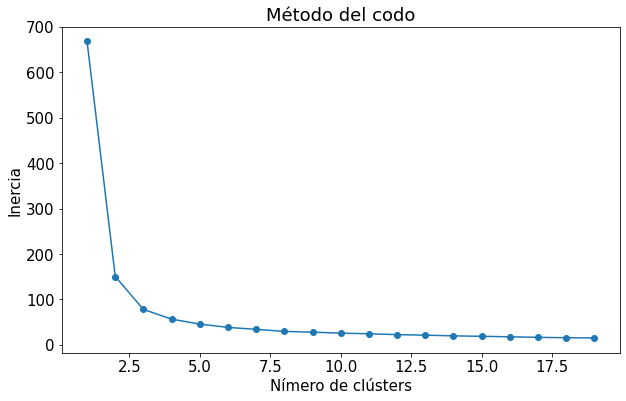

In [384]:
plt.figure(figsize =[10,6])
plt.title('Método del codo')
plt.xlabel('Nímero de clústers')
plt.ylabel('Inercia')
plt.plot ( list(range(1,20)), inercia, marker='o')
plt.show


In [385]:
algoritmo = KMeans( n_clusters=3, init ='k-means++', max_iter=300, n_init =10)

In [386]:
algoritmo.fit(X)

KMeans(n_clusters=3)

In [387]:
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [388]:
centroides

array([[5.875     , 2.73333333, 4.38666667, 1.43333333],
       [5.01020408, 3.43469388, 1.45918367, 0.24693878],
       [6.85263158, 3.07368421, 5.71578947, 2.04736842]])

In [389]:
etiquetas

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [357]:
print (centroides)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [358]:
etiquetas

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [390]:
Xmuestras = muestras.iloc[:, [0, 1, 2,3]].values
YMuestraPrediccion = algoritmo.predict (Xmuestras )

In [391]:
print (YMuestraPrediccion)

[1 0 2]


In [364]:
muestras

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.8,3.1,1.6,0.2,setosa
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.2,5.7,2.3,virginica


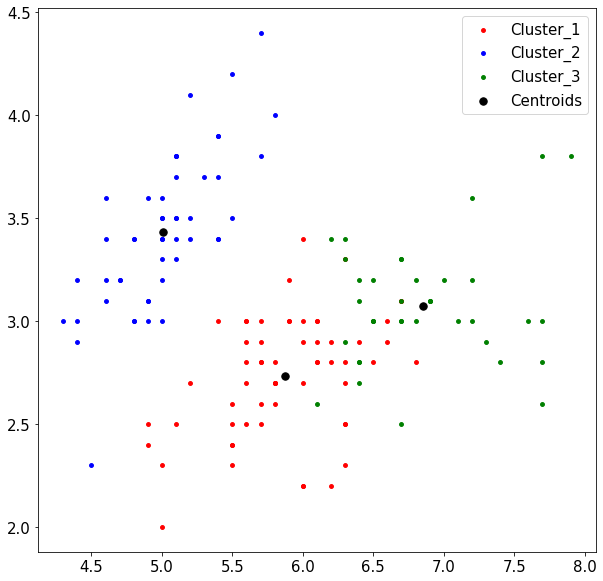

In [406]:
#Aplicando k-means al dataset / creacion del clasificador con k-means
plt.figure(figsize =[10,10])
plt.scatter(X[etiquetas == 0,0], X[etiquetas==0,1], s = 15, c= 'red', label = 'Cluster_1')
plt.scatter(X[etiquetas== 1,0], X[etiquetas==1,1], s = 15, c= 'blue', label = 'Cluster_2')
plt.scatter(X[etiquetas == 2,0], X[etiquetas==2,1], s = 15, c= 'green', label = 'Cluster_3')
plt.scatter(centroides[:,0], centroides[:,1], s = 55, c = 'black', label = 'Centroids')
plt.legend()
plt.show()